In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import pandas as pd

from sampling.ensamble import Sampler as EnsambleSampler

from benchmarks.benchmarks_mchmc import *
from benchmarks.german_credit import Target as GermanCredit
from benchmarks.brownian import Target as Brownian
from benchmarks.IRT import Target as IRT


num_cores = jax.local_device_count()
print(num_cores, jax.lib.xla_bridge.get_backend().platform)

targets = [[Banana(prior = 'prior'), 100],
        [IllConditionedGaussianGamma(prior = 'prior'), 1500],
        [GermanCredit(), 1000],
        [Brownian(), 200],
        [IRT(), 500],
        [StochasticVolatility(), 1000]]

2023-05-22 20:52:09.596186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-22 20:52:10.445940: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-22 20:52:10.446034: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-22 20:52:10.446042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed proper

1 cpu


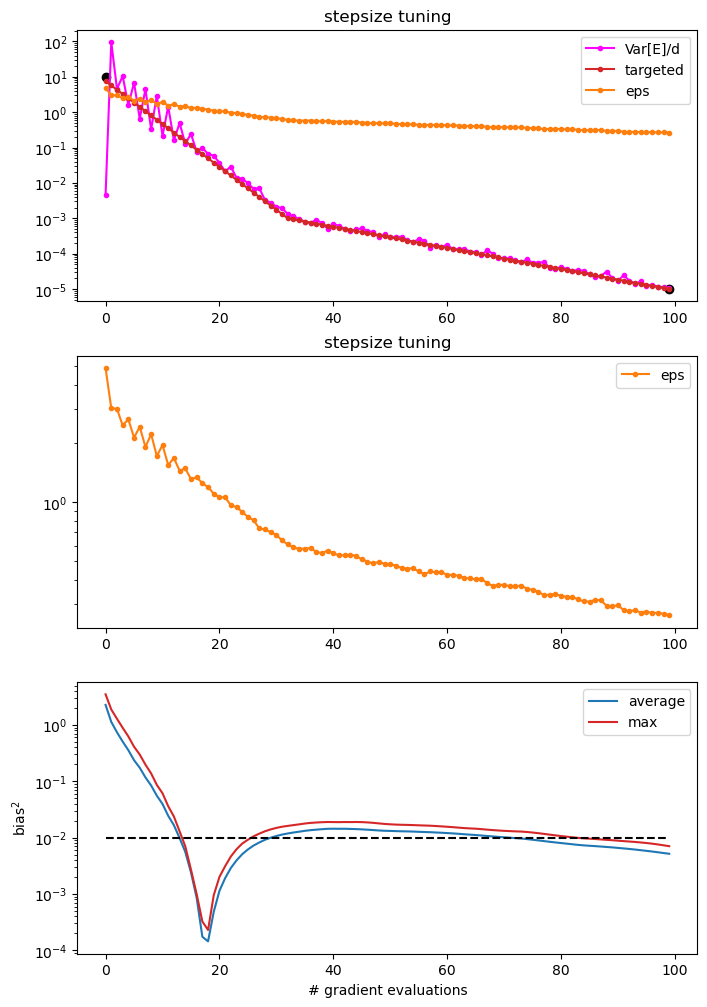

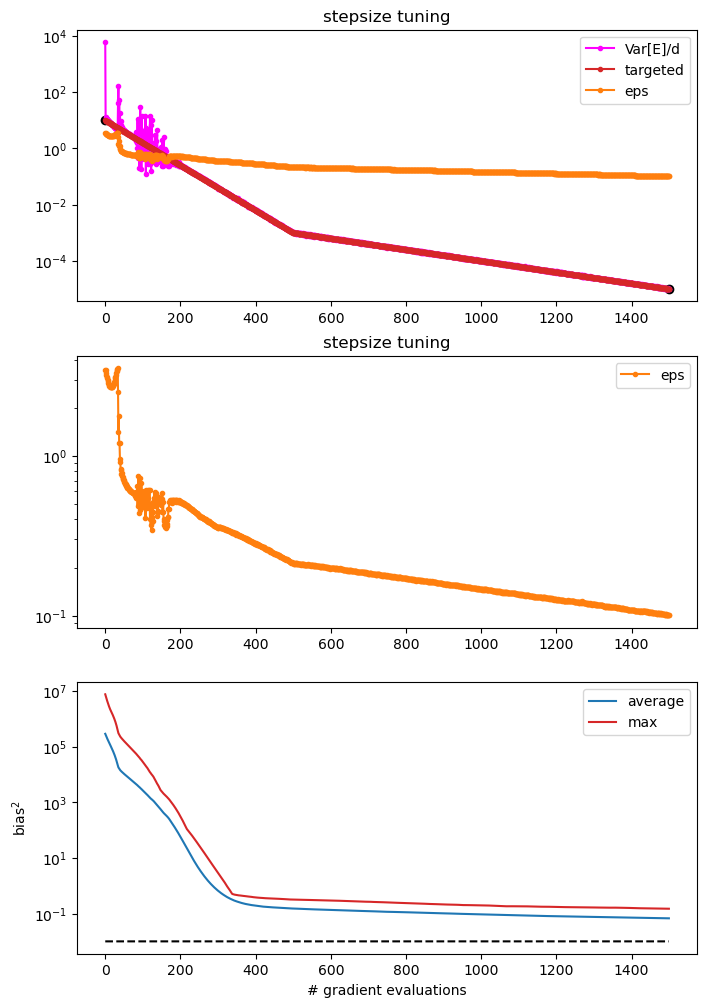

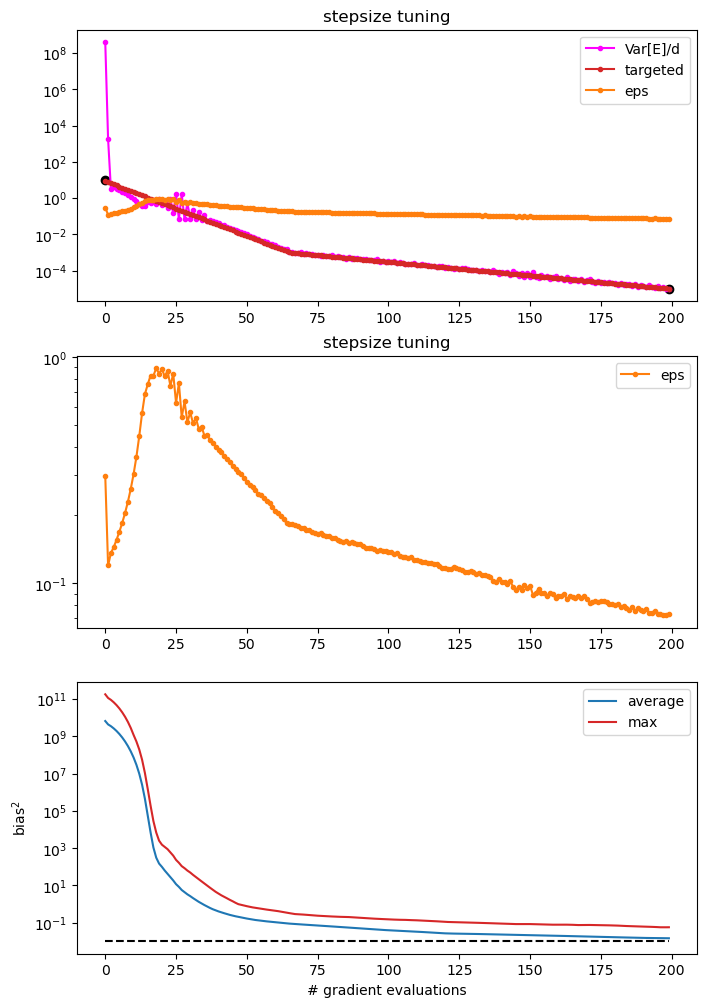

In [2]:
for i in [0, 1, 3 ]:
    target, num_steps = targets[i]
    sampler = EnsambleSampler(target, 4096, diagonal_preconditioning = False)
    x = sampler.sample(num_steps)